# Problem 6

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression

# Multinomial Classification in SciKit-Learn

## Load Dataset
#### (Don't edit this)
- (x,y) values are stored in rows of `xy`
- class values are in `c`

In [2]:
x = np.array([7.4881350392732475,16.351893663724194,22.427633760716436,29.04883182996897,35.03654799338904,44.45894113066656,6.375872112626925,18.117730007820796,26.036627605010292,27.434415188257777,38.71725038082664,43.28894919752904,7.680445610939323,18.45596638292661,17.110360581978867,24.47129299701541,31.002183974403255,46.32619845547938,9.781567509498505,17.90012148246819,26.186183422327638,31.59158564216724,35.41479362252932,45.805291762864556,3.182744258689332,15.599210213275237,17.833532874090462,33.04668917049584,36.018483217500716,42.146619399905234,4.64555612104627,16.942336894342166,20.961503322165484,29.284339488686488,30.98789800436355,44.17635497075877,])
y = np.array([0.11120957227224215,0.1116933996874757,0.14437480785146242,0.11818202991034835,0.0859507900573786,0.09370319537993416,0.2797631195927265,0.216022547162927,0.27667667154456677,0.27706378696181594,0.2310382561073841,0.22289262976548535,0.40154283509241845,0.4063710770942623,0.427019677041788,0.41386015134623205,0.46883738380592266,0.38020448107480287,0.5508876756094834,0.5461309517884996,0.5953108325465398,0.5553291602539782,0.5766310772856306,0.5544425592001603,0.705896958364552,0.7010375141164304,0.7556329589465274,0.7038182951348614,0.7096582361680054,0.7268725170660963,0.9320993229847936,0.8597101275793062,0.9337944907498804,0.8596098407893963,0.9476459465013396,0.8968651201647702,])
xy = np.vstack([x,y]).T
c = np.array([0,2,2,2,2,2,0,2,2,2,2,2,0,0,2,0,1,2,0,0,1,1,1,2,0,1,0,1,1,1,0,0,1,1,1,1,])

## Logistic Regression
SciKit-Learn's Logistic Regression model will perform multinomial classification automatically.

Create an sklearn `LogisticRegression()` class and train this model on the dataset


Details about how to use this are here:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html



In [11]:
from sklearn.linear_model import LogisticRegression

def get_logistic_regressor(features, classes):
    model = LogisticRegression(multi_class="multinomial", solver="lbfgs")
    model.fit(features, classes)

    return model

In [12]:
model = get_logistic_regressor(xy, c)
preds = model.predict(xy)
accuracy = np.sum(preds == c) / len(c) * 100
print("True Classes:", c)
print(" Predictions:", preds)
print("    Accuracy:", accuracy, r"%")

True Classes: [0 2 2 2 2 2 0 2 2 2 2 2 0 0 2 0 1 2 0 0 1 1 1 2 0 1 0 1 1 1 0 0 1 1 1 1]
 Predictions: [0 0 2 2 2 2 0 0 2 2 2 2 0 0 0 2 2 2 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1]
    Accuracy: 80.55555555555556 %


/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


## Plotting Multinomial Classifier Results
Here, we have made some plotting functions -- run these cells to visualize the decision boundaries.

In [13]:
def plot_data(x, y, c, title="Phase of simulated material", newfig=True):
    xlim = [0,52.5]
    ylim = [0,1.05]
    markers = [dict(marker="o", color="royalblue"), dict(marker="s", color="crimson"), dict(marker="^", color="limegreen")]
    labels = ["Solid", "Liquid", "Vapor"]

    if newfig:
        plt.figure(dpi=150)

    for i in range(1+max(c)):
        plt.scatter(x[c==i], y[c==i], s=60, **(markers[i]), edgecolor="black", linewidths=0.4,label=labels[i])

    plt.title(title)
    plt.legend(loc="upper right")
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel("Temperature, K")
    plt.ylabel("Pressure, atm")
    plt.box(True)

def plot_sklearn_colors(model, res=40):
    xlim = [0,52.5]
    ylim = [0,1.05]
    xvals = np.linspace(*xlim,res)
    yvals = np.linspace(*ylim,res)
    x,y = np.meshgrid(xvals,yvals)
    XY = np.concatenate((x.reshape(-1,1),y.reshape(-1,1)),axis=1)

    color = model.predict(XY).reshape(res,res)

    cmap = ListedColormap(["lightblue","lightcoral","palegreen"])
    plt.pcolor(x, y, color, shading="nearest", zorder=-1, cmap=cmap,vmin=0,vmax=2)
    return

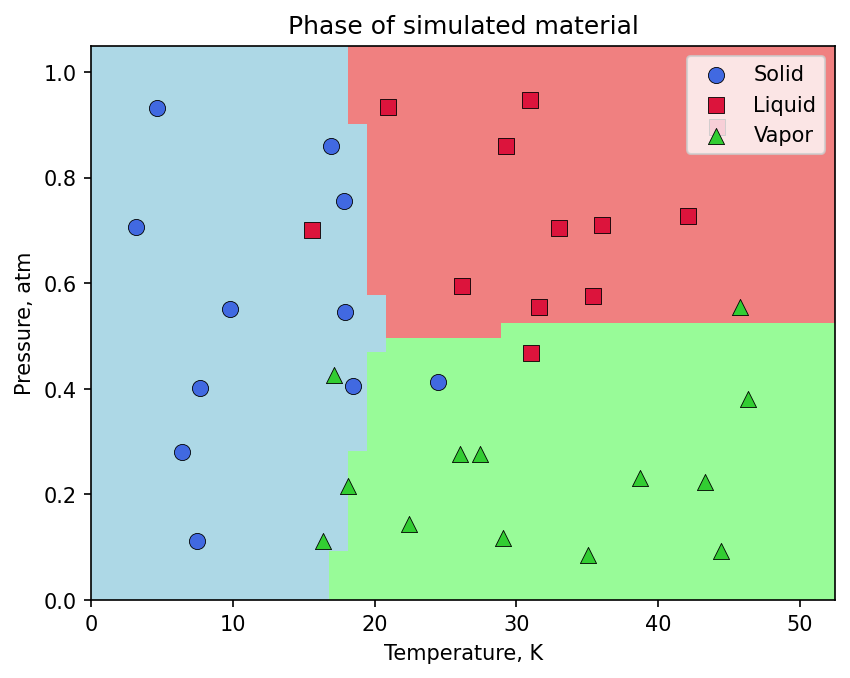

In [14]:
plot_data(x,y,c)
plot_sklearn_colors(model)
plt.show()